# Insurance Data Analysis

## Outline

+ Introduction

+ Data Overview

+ Exploratory Data Analysis

+ Feature Engineering

+ Hypothesis Testing

+ Results and Conclusion

## Introduction

Insurance companies have a tough task at determining premiums for their customers. While the health care law in the United States as an example does have some rules for the companies to follow to determine premiums, it is really up to the companies on what factors they want to hold more weight to.

So, what are the most important factors? how much statistical importance do they hold? and between LASSO, Ridge and Linear regression which model has the highest accuracy ?

To answer this problematic there is nothing better than the most interpretable model, linear regression, but before going into modeling, we will try in this report to uncover some insights about our data using EDA and Hypothesis Testing.

## Data Overview

The insurance dataset was took from [here](https://www.kaggle.com/mirichoi0218/insurance "Kaggle") and this is a brief description :

"Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book."

#### Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

#### Acknowledgements
The dataset is available on GitHub [here](https://github.com/stedy/Machine-Learning-with-R-datasets. "There are other interesting datasets too")


## Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [2]:
!pip install wget
import wget
file = wget.download('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

100% [..............................................................................] 54288 / 54288

In [3]:
data = pd.read_csv(file)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Text(0.5, 1.0, 'Charges Boxplot')

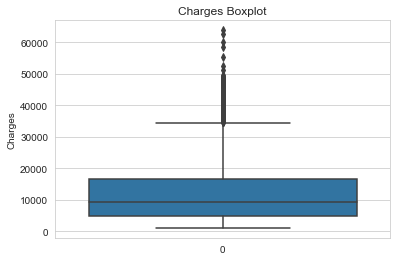

In [7]:
ax = sns.boxplot(data = data['charges'], orient = 'Vertical')
ax.set_ylabel('Charges')
ax.set_title('Charges Boxplot')

At first glance, it seems that the charges column has many outliers, before dealing with them we'll check the charges by smoking status

Text(0.5, 1.0, 'Charges Boxplot by smoking status')

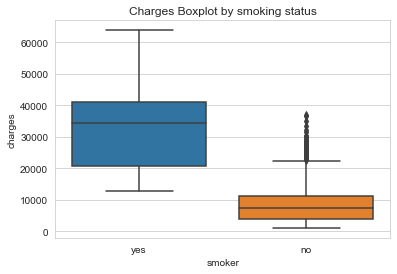

In [8]:
ax = sns.boxplot(x='smoker', y='charges', data=data)
ax.set_title('Charges Boxplot by smoking status')

Now that huge amount of outliers seems be justified, since smokers are subjects to greater risk, which should be reflected in the amount of charges billed to them by the insurance firm.

Text(0.5, 1.0, 'Charges Boxplot by smoking status')

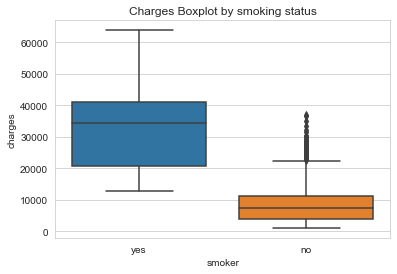

In [9]:
ax = sns.boxplot(x='smoker', y='charges', data=data)
ax.set_title('Charges Boxplot by smoking status')

Let's explore our data in more detail.

Text(0.5, 1.0, 'Number of children by gender')

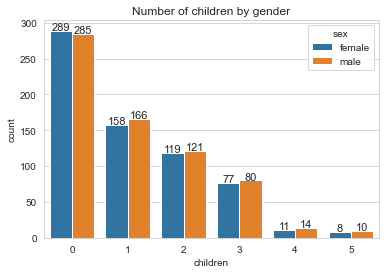

In [10]:
ax =sns.countplot(x = 'children', hue='sex', data=data)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
ax.set_title('Number of children by gender')

Text(0.5, 1.0, 'Smoking status by gender')

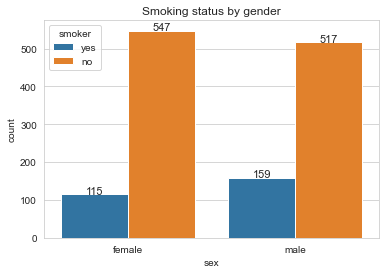

In [11]:
ax =sns.countplot(x = 'sex', hue='smoker', data=data)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
ax.set_title('Smoking status by gender')

Text(0.5, 1.0, 'Insurance by region')

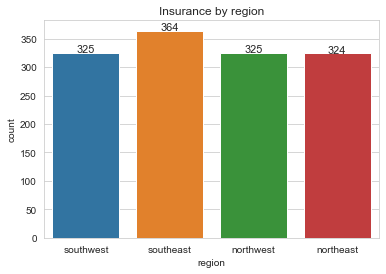

In [12]:
ax =sns.countplot(x = 'region', data=data)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
ax.set_title('Insurance by region')

Text(0.5, 1.0, 'Insurance destribution by age')

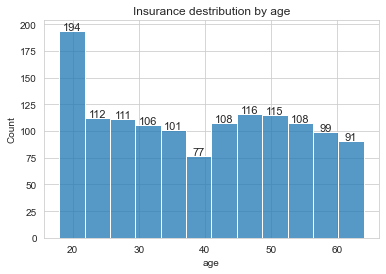

In [13]:
ax = sns.histplot(data['age'], kde = False)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
ax.set_title('Insurance destribution by age')

Text(0.5, 1.0, 'Charges destribution')

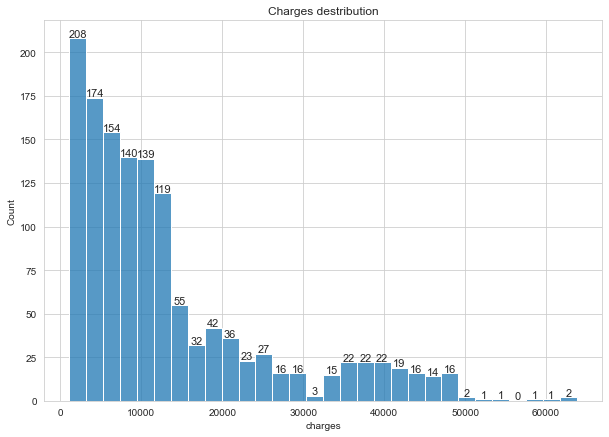

In [14]:
plt.subplots(figsize = (10,7))
ax = sns.histplot(data['charges'], kde = False)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
ax.set_title('Charges destribution')

In [15]:
from scipy.stats import shapiro
stat, p = shapiro(data['charges'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.815, p=0.000
Probably not Gaussian


Text(0.5, 1.0, 'Charges destribution')

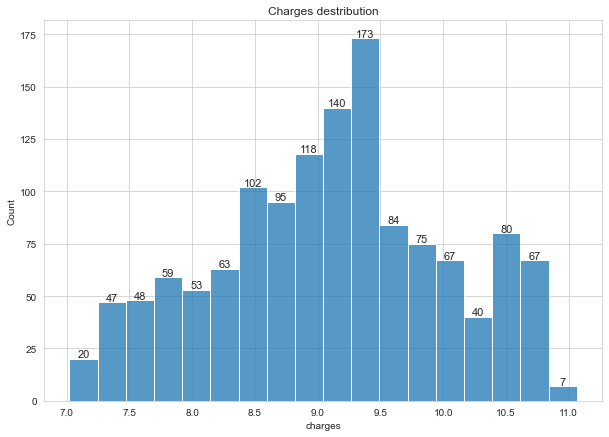

In [16]:
plt.subplots(figsize = (10,7))
ax = sns.histplot(np.log(data['charges']), kde = False)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
ax.set_title('Charges destribution')

In [17]:
from scipy.stats import shapiro
stat, p = shapiro(np.log(data['charges']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.983, p=0.000
Probably not Gaussian


## Feature Engineering

In this section we will:
+ Label some features and prepare them for modeling.
+ Discretize the BMI variable and uncover some insights about it. 
+ Transform the BMI distribution to Gaussian.

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
data['smoker'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


#### According to the CDC (Centers of Desease Control and Prevention), adults BMI is related to their weight status as follows:

BMI | Weight Status
:---: | :---:
Below 18.5 | Underweight
18.5 – 24.9 | Healthy Weight
25.0 – 29.9 | Overweight
30.0 and Above | Obesity

In [20]:
from IPython.display import HTML
HTML('<html><head><style>h3 {text-align: center;} <div style="text-align:center;"> </style></head><body> <h3>BMI For Adults Widget</h3><br /><br /><div class="iframe-container"><iframe src="https://www.cdc.gov/healthyweight/assessing/adult-widget/iframe.html" width=170 height=395></iframe></div><style>.iframe-container {text-align:center}</style>')

In [21]:
data.loc[(data['bmi'] < 18.5 ), 'bmi_group'] = 'Underweight'
data.loc[(data['bmi'] >= 18.5)&(data['bmi'] < 25), 'bmi_group' ] = 'Healthy Weight'
data.loc[(data['bmi'] >= 25)&(data['bmi'] < 30), 'bmi_group'] = 'Overweight'
data.loc[(data['bmi'] >= 30), 'bmi_group'] = 'Obesity'
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_group
0,19,female,27.900,0,1,southwest,16884.92400,Overweight
1,18,male,33.770,1,0,southeast,1725.55230,Obesity
2,28,male,33.000,3,0,southeast,4449.46200,Obesity
3,33,male,22.705,0,0,northwest,21984.47061,Healthy Weight
4,32,male,28.880,0,0,northwest,3866.85520,Overweight


Text(0.5, 1.0, 'Charges Boxplot by smoking status')

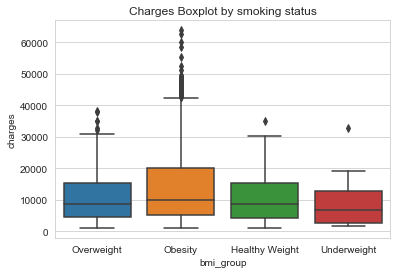

In [22]:
ax = sns.boxplot(x='bmi_group', y='charges', data=data)
ax.set_title('Charges Boxplot by smoking status')

In [23]:
mean = data.groupby('bmi_group')['charges'].mean()
mean = mean.to_frame()
mean = mean.sort_values(by='charges')
mean

,charges
bmi_group,
Underweight,8852.200585
Healthy Weight,10409.337709
Overweight,10987.509891
Obesity,15552.335469


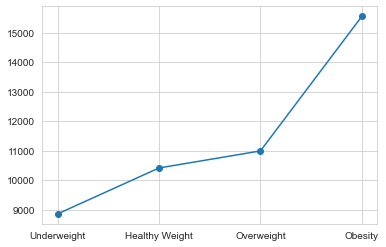

In [24]:
plt.plot(mean, 'o', linestyle='-')

#### We can see that the mean of the charges is correlated positively with the BMI categories

Text(0.5, 1.0, 'BMI distribution')

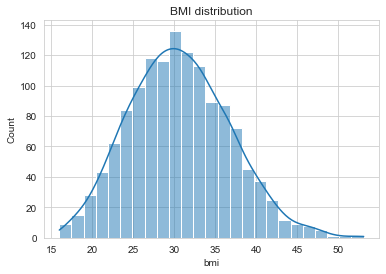

In [25]:
ax = sns.histplot(data['bmi'], kde = True)
ax.set_title('BMI distribution')

**Visually we can see that the dansity function curve is chaped like a bell, is it enough to assume that the distribution is normal ?**

**Let's perform Shapiro-Wilk Normality test**

### Shapiro-Wilk Normality Test

Let's test whether the BMI has a Gaussian distribution.

Here are the hypothesis.

**H0: the sample has a Gaussian distribution.**

**H1: the sample does not have a Gaussian distribution.**

In [26]:
from scipy.stats import shapiro
stat, p = shapiro(data['bmi'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.994, p=0.000
Probably not Gaussian


**Even though we got a bell shaped density function plot, statistically we can't assume that it has a normal distribution.**

**We will try to transform it by using the square root function (sqrt).**

Text(0.5, 1.0, 'Transformed BMI distribution')

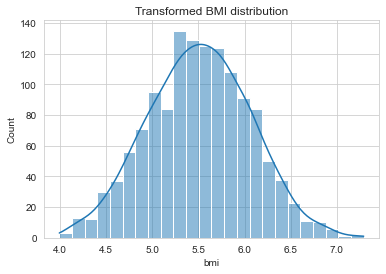

In [27]:
bmi = np.array(data['bmi'])
sqrt_bmi = np.sqrt(data['bmi'])
ax = sns.histplot(sqrt_bmi, kde = True)
ax.set_title('Transformed BMI distribution')

## Shapiro-Wilk Normality Test

Let's test whether the transformed BMI has a Gaussian distribution.

Here are the hypothesis.

**H0: the sample has a Gaussian distribution.**

**H1: the sample does not have a Gaussian distribution.**

In [28]:
from scipy.stats import shapiro
stat, p = shapiro(sqrt_bmi)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.999, p=0.345
Probably Gaussian


**Now we can assume that the variable is normally distributed.**

In [29]:
# let's calculate the probability of having a healthy BMI
from math import sqrt
from scipy.stats import norm
sqrt_mean = sqrt_bmi.mean()
sqrt_sd = sqrt_bmi.std()

upper_limit = norm.cdf((sqrt(24.9) - sqrt_mean)/(sqrt_sd))
lower_limit = norm.cdf((sqrt(18.5) - sqrt_mean)/(sqrt_sd))
prob = upper_limit - lower_limit
print('The probability that someone chosen randomly has a healthy BMI is {}%'.format(round(prob*100, 2)))

The probability that someone chosen randomly has a healthy BMI is 15.88%


In [30]:
# According to the CDC a person reach obesity when the BMI is 30 or above

prob1 = 1-norm.cdf((sqrt(30) - sqrt_mean)/(sqrt_sd))
print('The probability that someone chosen randomly has obesity is {}%'.format(round(prob1*100, 2)))

The probability that someone chosen randomly has obesity is 52.36%


## Hypothesis Testing

**Since the bmi variable follows the Normal distribution, it's worth to test:**
+ whether the bmi differ by gender.
+ whether the bmi differ by region.

In [31]:
data.groupby('sex')['bmi'].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

### T-Test

We would like to test whether there is a difference in the BMI by gender.

let's state our hypothesis:

**H0: the means of the samples are equal.**

**H1: the means of the samples are unequal.**

In [32]:
female_bmi = data.loc[data['sex'] == 'female']['bmi']
male_bmi = data.loc[data['sex'] == 'male']['bmi']

# Example of the Student's t-test
from scipy.stats import ttest_ind
stat, p = ttest_ind(female_bmi, male_bmi)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Statistically the means are the same')
else:
    print('Statistically the means are not the same')

stat=-1.697, p=0.090
Statistically the means are the same


In [33]:
region_mean = data.groupby('region')['bmi'].mean()
region_mean.to_frame()

,bmi
region,
northeast,29.173503
northwest,29.199785
southeast,33.355989
southwest,30.596615


### ANOVA Test

To test whether the means are equal by region we will use the one-way ANOVA test.

Let's state our hypothesis.

**H0: the means of the samples are equal.**

**H1: one or more of the means of the samples are unequal.**

In [34]:
from scipy.stats import f_oneway
northwest_bmi = data.loc[data['region'] == 'northwest']['bmi']
northeast_bmi = data.loc[data['region'] == 'northeast']['bmi']
southwest_bmi = data.loc[data['region'] == 'southwest']['bmi']
southeast_bmi = data.loc[data['region'] == 'southeast']['bmi']
stat, p = f_oneway(northwest_bmi, northeast_bmi, southwest_bmi, southeast_bmi)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Statistically the means are equal')
else:
    print('Statistically there is at least one mean that is different from the others')

stat=39.495, p=0.000
Statistically there is at least one mean that is different from the others


## Results

We got insightful visualizations about our data's distribution and variables.

We saw how important the outliers from the charges variable, and why it's convenient to keep them since they represent the smoking and obese people who obviously are exposed to greater risk.

After transforming the BMI variable, we were able to calculate the probabilities of chosing randomly a healthy person and an obese person which evaluated respectively to 15.88% and 52.36%.

Finally, we saw how the BMI means by gender are statistically equivalent, while they differ by region.

Next we will try to predict charges using a famous Machine Learning technique which is Regression.

### Machine Learning

Now let's check our data again

In [35]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_group
0,19,female,27.900,0,1,southwest,16884.92400,Overweight
1,18,male,33.770,1,0,southeast,1725.55230,Obesity
2,28,male,33.000,3,0,southeast,4449.46200,Obesity
3,33,male,22.705,0,0,northwest,21984.47061,Healthy Weight
4,32,male,28.880,0,0,northwest,3866.85520,Overweight


Now we ended up with an interesting form, since the BMI variable is repeated in a descrete form within the BMI_group variable.

We avoid using both variables in the same model and compare which one comes with better results.

The **first model** (model 1) will use the bmi variable and the **second model** (model 2) will use the bmi_group variable.

For both data sets, we will fit and compare the results of the following models:
- Linear regression without scaling the variables
- Linear regression scaling the variables
- Ridge regression
- Lasso regression

In [36]:
target = data['charges']

### Model 1

In [37]:
data1 = data.drop(['bmi_group','charges'], axis = 1)
data1.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,1,southwest
1,18,male,33.770,1,0,southeast
2,28,male,33.000,3,0,southeast
3,33,male,22.705,0,0,northwest
4,32,male,28.880,0,0,northwest


In [38]:
data.dtypes

age            int64
sex           object
bmi          float64
children       int64
smoker         int64
region        object
charges      float64
bmi_group     object
dtype: object

In [39]:
# we will apply one hot encoding to categorical variables
data1 = pd.get_dummies(data1, drop_first=True, columns=['sex', 'region'])
data1.head()

,age,bmi,children,smoker,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,0,1
1,18,33.770,1,0,1,0,1,0
2,28,33.000,3,0,1,0,1,0
3,33,22.705,0,0,1,1,0,0
4,32,28.880,0,0,1,1,0,0


In [40]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [41]:
kf = KFold(shuffle=True, random_state=555, n_splits=5)

**We will use grid search cv for our parameter tuning and extract meaningful results for model comparison.**

### Model 1 Linear regression without scaling the variables

In [42]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
                      ("linear_regression", LinearRegression())])

params = {
    'polynomial_features__degree': [1, 2, 3]
}

grid = GridSearchCV(estimator, params, cv=kf)

grid.fit(data1, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=555, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid={'polynomial_features__degree': [1, 2, 3]})

In [43]:
best_score = grid.best_score_
alpha_degree = (None, grid.best_params_['polynomial_features__degree'])
grid.best_score_, grid.best_params_

(0.80498278137892, {'polynomial_features__degree': 2})

In [44]:
y_predict = grid.predict(data1)
R2_score = r2_score(target, y_predict)
R2_score

0.8263982356893842

In [45]:
lin_reg = [best_score, alpha_degree, R2_score]

In [46]:
grid.best_estimator_.named_steps['linear_regression'].coef_

array([-2.42776896e+14, -9.48522278e+00,  1.21766541e+03,  2.14934236e+03,
       -1.16106515e+04,  1.57063411e+01, -4.35292528e+02,  1.09503035e+03,
       -1.41419043e+03,  3.42281159e+00, -8.41032041e-01, -1.31590000e+01,
        6.36059624e+00, -3.24930299e+00,  2.40093767e+01,  3.32666565e+01,
        5.25883999e+01, -1.59068005e+01, -5.79741546e+01,  1.48347083e+03,
       -4.68431718e+01, -6.06927929e+01, -1.76246304e+02, -2.97008648e+00,
        1.98220737e+02,  3.18172890e+02, -1.64280590e+01,  8.58725959e+02,
        9.74944317e+02, -1.20970446e+03, -1.16106515e+04,  2.72831080e+03,
        4.48508446e+02,  4.85329068e+02, -3.75695394e+03,  1.57063411e+01,
       -5.25585778e+01, -2.77421424e+02,  2.71545681e+03, -4.35292528e+02,
        0.00000000e+00,  0.00000000e+00,  1.09503035e+03,  0.00000000e+00,
       -1.41419043e+03])

### Model 1 Linear Regression scaled variables

In [47]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("linear_regression", LinearRegression())])

params = {
    'polynomial_features__degree': [1, 2, 3]
}

grid = GridSearchCV(estimator, params, cv=kf)

grid.fit(data1, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=555, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid={'polynomial_features__degree': [1, 2, 3]})

In [48]:
best_score = grid.best_score_
alpha_degree = (None, grid.best_params_['polynomial_features__degree'])
grid.best_score_, grid.best_params_

(0.829965126687363, {'polynomial_features__degree': 2})

In [49]:
y_predict = grid.predict(data1)
R2_score = r2_score(target, y_predict)
R2_score

0.847724191182748

In [50]:
lin_reg_scaled = [best_score, alpha_degree, R2_score]

In [51]:
grid.best_estimator_.named_steps['linear_regression'].coef_

array([ 8.91874812e+11,  3.58666185e+03,  1.96787044e+03,  9.76769613e+02,
        3.90299409e+15,  4.64943830e+13, -8.77428452e+15, -3.21493153e+16,
       -2.08290804e+15,  8.01572493e+02,  5.02655252e+01, -9.12860186e+01,
       -2.89492861e+01,  1.23563197e+02,  1.04043340e+02,  3.30772521e+02,
        2.74900267e+02, -2.35873652e+02,  2.00301188e+01,  3.64025048e+03,
        1.86750312e+01, -3.69470407e+01, -3.82637836e+02, -2.05459569e+02,
       -1.37265727e+02, -1.81197729e+02, -1.36556813e+02,  1.24082500e+02,
       -1.28228573e+02, -2.07371051e+02, -2.66757659e+15, -1.17041019e+01,
       -7.48406225e+01, -2.10032229e+02,  1.58595345e+02,  2.22164568e+15,
        8.86137498e+01,  1.59852476e+02,  6.70488298e+01,  1.13560489e+16,
       -2.99947801e+16,  4.09218254e+16,  3.38851846e+16,  3.45233683e+16,
        3.86691196e+16])

### Model 1 Ridge Regression

**N.B : While alpha ranges used in models such as Lasso and Ridge regression may look inconsistent, we will just overlook this since those ranges contain the parameters that produce good results.**

In [52]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 40, 50)
}

grid = GridSearchCV(estimator, params, cv=kf)

grid.fit(data1, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=555, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.19245254,  4.39416457,  4.6055816 ,  4.82717056,
        5.05942087,  5.30284546,  5.557...
       10.23819169, 10.73078318, 11.24707479, 11.78820681, 12.35537439,
       12.94983017, 13.57288709, 14.22592122, 14.91037488, 15.62775975,
       16.37966025, 17.16773704, 17.99373068, 18.85946545, 19.76685345,
       20.71789872, 21.71470176, 22.75946412, 23.85449327, 25.0022077 ,
       26.20514227, 27.4659538 , 28.78742692, 30.17248025, 31.62417284,
       33.14571091, 34.74045495, 36.41192712, 38.16381905, 40.        ])

In [53]:
best_score = grid.best_score_
alpha_degree = (grid.best_params_['ridge_regression__alpha'], grid.best_params_['polynomial_features__degree'])
grid.best_score_, grid.best_params_

(0.8315159135685688,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 31.62417284363078})

In [54]:
y_predict = grid.predict(data1)
R2_score = r2_score(target, y_predict)
R2_score

0.8475929725707861

In [55]:
ridge_reg = [best_score, alpha_degree, R2_score]

In [56]:
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([   0.        , 3520.74242921, 1969.47925434,  921.37892004,
       3046.25627283, -231.90195985,  -62.8962807 , -136.54268598,
       -156.70740433,  754.05551188,   58.13267811,  -92.63844429,
        -24.14138817,  121.81175982,   90.53882638,  309.09493264,
        251.68637839, -232.52326339,   27.78705107, 3538.48614972,
         25.3431592 ,  -30.9216258 , -348.30442266, -181.2539565 ,
       -128.2858983 , -182.04258938, -126.11796125,  129.00067836,
       -112.15908753, -205.69380699, 4457.04924345,    6.51360041,
        -57.83883577, -163.82309724,  155.51034134,    4.85322149,
         78.41588762,  148.21766501,   60.54554441,  -75.41660877,
        115.79020466,  124.38745475, -139.88402061,  173.13916527,
       -187.90206468])

### Model 1 Lasso Regression

In [57]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso(max_iter=100000))])

params = {
    'polynomial_features__degree': [1,2,3],
    'lasso_regression__alpha': np.geomspace(50, 90, 60)
}

grid = GridSearchCV(estimator, params, cv=kf)

grid.fit(data1, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=555, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('lasso_regression',
                                        Lasso(max_iter=100000))]),
             param_grid={'lasso_regression__alpha': array([50.        , 50.50061383, 51.00623995, 51.51692853, 52.03273027,
       52.55369636, 53.0798785 , 53.61132893, 54.148100...
       67.41702489, 68.09202279, 68.77377896, 69.46236106, 70.15783743,
       70.86027711, 71.5697498 , 72.28632593, 73.01007662, 73.74107371,
       74.47938974, 75.22509799, 75.97827248, 76.73898796, 77.50731993,
       78.28334466, 79.06713916, 79.85878123, 80.65834944, 81.46592314,
       82.2815825 , 83.10540847, 83.9374828 , 84.7778881 , 85.62670777,
       86.48402605, 87.34992804, 88.22449968, 89.10782778, 90.      

In [58]:
best_score = grid.best_score_
alpha_degree = (grid.best_params_['lasso_regression__alpha'], grid.best_params_['polynomial_features__degree'])
grid.best_score_, grid.best_params_

(0.8325039849660897,
 {'lasso_regression__alpha': 73.7410737070725,
  'polynomial_features__degree': 2})

In [59]:
y_predict = grid.predict(data1)
R2_score = r2_score(target, y_predict)
R2_score

0.8462302941184598

In [60]:
lasso_reg = [best_score, alpha_degree, R2_score]

In [61]:
grid.best_estimator_.named_steps['lasso_regression'].coef_

array([ 0.00000000e+00,  3.57505843e+03,  1.90603442e+03,  7.21441303e+02,
        0.00000000e+00, -1.63301869e+02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  6.20572563e+02,  1.86653904e+01, -0.00000000e+00,
       -0.00000000e+00,  4.55356925e+01, -0.00000000e+00,  1.51056518e+02,
        7.29016081e+01, -2.00820277e+02, -0.00000000e+00,  3.51874135e+03,
        0.00000000e+00,  1.11643692e+01, -2.18594100e+02, -0.00000000e+00,
       -1.73408782e+01, -9.58858838e+01, -5.31017959e+01,  1.38192408e+02,
       -0.00000000e+00, -1.09434547e+02,  6.54570313e+03,  0.00000000e+00,
       -0.00000000e+00, -7.61728496e+01,  1.14676709e+02,  0.00000000e+00,
        0.00000000e+00,  2.27302973e+01, -0.00000000e+00, -6.95310653e+01,
        4.97704551e+00,  0.00000000e+00, -0.00000000e+00,  4.18406586e+02,
       -7.41987842e+01])

In [62]:
lin_reg, lin_reg_scaled, ridge_reg, lasso_reg

([0.80498278137892, (None, 2), 0.8263982356893842],
 [0.829965126687363, (None, 2), 0.847724191182748],
 [0.8315159135685688, (31.62417284363078, 2), 0.8475929725707861],
 [0.8325039849660897, (73.7410737070725, 2), 0.8462302941184598])

In [63]:
ind = pd.MultiIndex.from_tuples([('Model_1','lin_reg'),('Model_1','lin_reg_scaled'),('Model_1','ridge_reg'),('Model_1','lasso_reg')])
col = [('Best_score'),('(Alpha, Polynomial_degree)'),('R2_score')]
Model_1 = pd.DataFrame([lin_reg,
                      lin_reg_scaled,
                      ridge_reg,
                      lasso_reg], index=ind, columns=col)
Model_1.sort_values(by='R2_score', ascending=False)

Best_score (Alpha, Polynomial_degree)  R2_score
Model_1 lin_reg_scaled    0.829965                  (None, 2)  0.847724
        ridge_reg         0.831516     (31.62417284363078, 2)  0.847593
        lasso_reg         0.832504      (73.7410737070725, 2)  0.846230
        lin_reg           0.804983                  (None, 2)  0.826398

**We see that all models produce the best results using polynomial degree 2.**

**Surprisingly, the scaled version of linear regression reached an accuracy on equal footing with Ridge and LASSO regression.**

**Next, we will just repeat the same steps using our discretized BMI_group variable instead of the continuous BMI variable.**

### Model 2

In [64]:
data2 = data.drop(['bmi','charges'], axis = 1)
data2.head()

,age,sex,children,smoker,region,bmi_group
0,19,female,0,1,southwest,Overweight
1,18,male,1,0,southeast,Obesity
2,28,male,3,0,southeast,Obesity
3,33,male,0,0,northwest,Healthy Weight
4,32,male,0,0,northwest,Overweight


In [65]:
data2 = pd.get_dummies(data2, drop_first=True, columns=['sex', 'region', 'bmi_group'])
data2.head()

,age,children,smoker,sex_male,region_northwest,region_southeast,region_southwest,bmi_group_Obesity,bmi_group_Overweight,bmi_group_Underweight
0,19,0,1,0,0,0,1,0,1,0
1,18,1,0,1,0,1,0,1,0,0
2,28,3,0,1,0,1,0,1,0,0
3,33,0,0,1,1,0,0,0,0,0
4,32,0,0,1,1,0,0,0,1,0


### Model 2 Linear regression without variables scaling.

In [66]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
                      ("linear_regression", LinearRegression())])

params = {
    'polynomial_features__degree': [1, 2, 3]
}

grid = GridSearchCV(estimator, params, cv=kf)

grid.fit(data2, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=555, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid={'polynomial_features__degree': [1, 2, 3]})

In [67]:
best_score = grid.best_score_
alpha_degree = (None, grid.best_params_['polynomial_features__degree'])
grid.best_score_, grid.best_params_

(0.8517098686270737, {'polynomial_features__degree': 2})

In [68]:
y_predict = grid.predict(data2)
R2_score = r2_score(target, y_predict)
R2_score

0.869463179501786

In [69]:
lin_reg = [best_score, alpha_degree, R2_score]

In [70]:
grid.best_estimator_.named_steps['linear_regression'].coef_

array([ 6.04903102e-10, -7.54907130e+01,  1.18248353e+03,  5.70261577e+03,
       -5.78203604e+02, -7.64728279e+02, -6.22084894e+02, -1.27751394e+03,
       -2.59795927e+02, -9.30999255e+02, -2.32675697e+03,  3.82629595e+00,
       -2.60248984e+00, -3.12519678e+00,  5.79295742e+00,  9.33377329e+00,
        3.77650434e+01,  2.45134252e+01,  1.44011808e+01,  3.04124959e+01,
        5.42459183e+01, -1.25715232e+02, -3.66697107e+02, -6.07464500e+01,
        8.28529075e+01, -2.98595600e+02, -3.92325602e+02,  3.43973058e+02,
        3.34448761e+02,  6.54277531e+01,  5.70261577e+03,  5.58313536e+01,
        9.60416510e+02,  1.41244811e+03,  7.53600840e+02,  2.14151939e+04,
        2.75497128e+03,  3.27647654e+03, -5.78203604e+02,  6.55090995e+02,
        1.52078133e+02,  4.59355712e+02, -1.30196198e+01,  6.13371513e+02,
       -1.10584789e+03, -7.64728279e+02,  2.84217094e-13, -9.09494702e-13,
        7.53482904e+00,  1.49962931e+02,  3.97784960e+03, -6.22084894e+02,
        0.00000000e+00, -

### Model 2 Linear Regression scaled variables

In [71]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("linear_regression", LinearRegression())])

params = {
    'polynomial_features__degree': [1, 2, 3]
}

grid = GridSearchCV(estimator, params, cv=kf)

grid.fit(data2, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=555, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid={'polynomial_features__degree': [1, 2, 3]})

In [72]:
best_score = grid.best_score_
alpha_degree = (None, grid.best_params_['polynomial_features__degree'])
grid.best_score_, grid.best_params_

(0.8514920934611669, {'polynomial_features__degree': 2})

In [73]:
y_predict = grid.predict(data2)
R2_score = r2_score(target, y_predict)
R2_score

0.8692157125924178

In [74]:
lin_reg_scaled = [best_score, alpha_degree, R2_score]

In [75]:
grid.best_estimator_.named_steps['linear_regression'].coef_

array([-8.75810642e+11,  3.63744781e+03,  1.03190508e+03,  2.15914916e+16,
        1.07067382e+14, -1.25526895e+16, -7.64485210e+15, -1.83149002e+16,
        3.86563264e+14, -4.94022286e+15,  1.45334130e+16,  7.57382812e+02,
       -5.40000000e+01, -9.50000000e+00,  3.27500000e+01,  5.49375000e+01,
        2.37500000e+02,  1.51000000e+02,  1.06000000e+02,  2.08000000e+02,
        9.15000000e+01, -1.89750000e+02, -1.72000000e+02, -3.65000000e+01,
        5.00000000e+01, -1.69125000e+02, -2.00500000e+02,  2.03000000e+02,
        1.78000000e+02, -8.00000000e+00, -1.47571214e+16,  1.42500000e+01,
        1.64250000e+02,  2.63500000e+02,  1.21000000e+02,  4.30400000e+03,
        4.98000000e+02,  1.73750000e+02,  5.11601122e+15,  1.40000000e+02,
        2.80000000e+01,  1.01812500e+02, -4.00000000e+00,  1.36000000e+02,
       -6.05000000e+01,  8.42702824e+15, -5.84734552e+15,  1.98876101e+15,
        1.30000000e+01,  4.30000000e+01,  2.08250000e+02,  2.20433851e+15,
       -2.95215421e+15, -

### Model 2  Ridge regression

In [76]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 40, 50)
}

grid = GridSearchCV(estimator, params, cv=kf)

grid.fit(data2, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=555, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.19245254,  4.39416457,  4.6055816 ,  4.82717056,
        5.05942087,  5.30284546,  5.557...
       10.23819169, 10.73078318, 11.24707479, 11.78820681, 12.35537439,
       12.94983017, 13.57288709, 14.22592122, 14.91037488, 15.62775975,
       16.37966025, 17.16773704, 17.99373068, 18.85946545, 19.76685345,
       20.71789872, 21.71470176, 22.75946412, 23.85449327, 25.0022077 ,
       26.20514227, 27.4659538 , 28.78742692, 30.17248025, 31.62417284,
       33.14571091, 34.74045495, 36.41192712, 38.16381905, 40.        ])

In [77]:
best_score = grid.best_score_
alpha_degree = (grid.best_params_['ridge_regression__alpha'], grid.best_params_['polynomial_features__degree'])
grid.best_score_, grid.best_params_

(0.8522931183263784,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 33.145710914187376})

In [78]:
y_predict = grid.predict(data2)
R2_score = r2_score(target, y_predict)
R2_score

0.8691647800185991

In [79]:
ridge_reg = [best_score, alpha_degree, R2_score]

In [80]:
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.00000000e+00,  3.55305159e+03,  9.52832090e+02,  3.03869806e+03,
       -2.39750760e+02, -2.99725291e+01, -8.74003948e+01, -1.60833522e+02,
        1.66194164e+03, -3.04263185e+02, -4.77857325e+00,  7.33954446e+02,
       -6.38515607e+01, -1.20985580e+01,  3.15551650e+01,  4.47188436e+01,
        2.17089492e+02,  1.33797800e+02,  9.43134171e+01,  1.77587528e+02,
        7.29364529e+01, -1.66527646e+02, -1.73591115e+02, -3.20365951e+01,
        5.22729404e+01, -1.41372450e+02, -1.92103528e+02,  1.93449320e+02,
        1.67240480e+02,  2.43282872e+01,  4.44599064e+03,  4.25829442e+01,
        1.62901809e+02,  2.73960069e+02,  1.40528771e+02,  4.08980337e+03,
        3.41378478e+02,  1.06412670e+02,  5.01748041e+00,  1.25539726e+02,
        1.79191822e+01,  8.94024682e+01, -5.65456163e-01,  1.34209160e+02,
       -8.00317389e+01, -3.59389534e+01,  6.78280633e+01,  1.08075960e+02,
       -7.36648160e+00,  2.53359111e+01,  1.98897319e+02, -8.95391689e+01,
        1.47826486e+02, -

### Model 2 Lasso regression

In [81]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso(max_iter=100000))])

params = {
    'polynomial_features__degree': [1,2,3],
    'lasso_regression__alpha': np.geomspace(80, 120, 60)
}

grid = GridSearchCV(estimator, params, cv=kf)

grid.fit(data2, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=555, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('lasso_regression',
                                        Lasso(max_iter=100000))]),
             param_grid={'lasso_regression__alpha': array([ 80.        ,  80.55167667,  81.10715767,  81.66646925,
        82.22963782,  82.79668998,  83.36765251,  83.94255236,
        84.52141...
        99.67749394, 100.36486578, 101.05697772, 101.75386242,
       102.45555282, 103.16208205, 103.87348347, 104.58979068,
       105.31103752, 106.03725805, 106.76848656, 107.5047576 ,
       108.24610593, 108.99256656, 109.74417476, 110.50096602,
       111.26297608, 112.03024092, 112.8027968 , 113.58068019,
       114.36392782, 115.15257671, 115.94666408, 116.74622744,
       117.55130456, 118.36193346, 

In [82]:
best_score = grid.best_score_
alpha_degree = (grid.best_params_['lasso_regression__alpha'], grid.best_params_['polynomial_features__degree'])
grid.best_score_, grid.best_params_

(0.855033666178441,
 {'lasso_regression__alpha': 97.64349540069045,
  'polynomial_features__degree': 2})

In [83]:
y_predict = grid.predict(data2)
R2_score = r2_score(target, y_predict)
R2_score

0.8663602384916383

In [84]:
lasso_reg = [best_score, alpha_degree, R2_score]

In [85]:
grid.best_estimator_.named_steps['lasso_regression'].coef_

array([   0.        , 3597.59818155,  691.38256522,    0.        ,
       -138.62658251,   -0.        ,   -0.        ,   -0.        ,
       1968.06562834,    0.        ,   -0.        ,  562.8567835 ,
         -0.        ,   -0.        ,    0.        ,   -0.        ,
         42.26380445,    0.        ,    0.        ,    0.        ,
          0.        ,  -12.23936896,  -45.48926127,   -0.        ,
         44.75716598,   -0.        ,  -43.04522847,    0.        ,
          0.        ,    0.        , 6526.49187799,    0.        ,
          0.        ,   85.1068549 ,    0.        , 3978.60247418,
        156.34648523,    0.        ,    0.        ,    0.        ,
         -0.        ,    0.        ,   -0.        ,   92.47686495,
         -0.        ,   -0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,   53.99047068,   -0.        ,
        111.68362523,   -0.        ,  -42.28712766,    0.        ,
       -197.58539248,   -0.        ,  157.44565966,    0.     

In [86]:
lin_reg, lin_reg_scaled, ridge_reg, lasso_reg

([0.8517098686270737, (None, 2), 0.869463179501786],
 [0.8514920934611669, (None, 2), 0.8692157125924178],
 [0.8522931183263784, (33.145710914187376, 2), 0.8691647800185991],
 [0.855033666178441, (97.64349540069045, 2), 0.8663602384916383])

In [87]:
ind = pd.MultiIndex.from_tuples([('Model_2','lin_reg'),('Model_2','lin_reg_scaled'),('Model_2','ridge_reg'),('Model_2','lasso_reg')])
col = [('Best_score'),('(Alpha, Polynomial_degree)'),('R2_score')]
Model_2 = pd.DataFrame([lin_reg,
                      lin_reg_scaled,
                      ridge_reg,
                      lasso_reg], index=ind, columns=col)
Model_2.sort_values(by='R2_score', ascending=False)

Best_score (Alpha, Polynomial_degree)  R2_score
Model_2 lin_reg           0.851710                  (None, 2)  0.869463
        lin_reg_scaled    0.851492                  (None, 2)  0.869216
        ridge_reg         0.852293    (33.145710914187376, 2)  0.869165
        lasso_reg         0.855034     (97.64349540069045, 2)  0.866360

**We see that the models using the discretized BMI variable achieved an accuracy close to 87%**

In [88]:
Results = pd.concat([Model_1,Model_2])
Results.sort_values(by='R2_score', ascending=False)

Best_score (Alpha, Polynomial_degree)  R2_score
Model_2 lin_reg           0.851710                  (None, 2)  0.869463
        lin_reg_scaled    0.851492                  (None, 2)  0.869216
        ridge_reg         0.852293    (33.145710914187376, 2)  0.869165
        lasso_reg         0.855034     (97.64349540069045, 2)  0.866360
Model_1 lin_reg_scaled    0.829965                  (None, 2)  0.847724
        ridge_reg         0.831516     (31.62417284363078, 2)  0.847593
        lasso_reg         0.832504      (73.7410737070725, 2)  0.846230
        lin_reg           0.804983                  (None, 2)  0.826398

**Interestingly, models using the discretized version of the BMI variable outperformed the ones using the continuous version of the same variable.**

In [89]:
df_importances = pd.DataFrame(zip(grid.best_estimator_.named_steps['polynomial_features'].get_feature_names(input_features=data2.columns),
                 grid.best_estimator_.named_steps['lasso_regression'].coef_,
), columns=['Feature', 'Coef'])

print('The total number of features is: {}]'.format(df_importances.shape[0]))
df_importances.drop(df_importances[df_importances['Coef']==0].index, inplace=True)
df_importances.sort_values(by='Coef', ascending=False, inplace=True)
df_importances.reset_index(inplace=True, drop=True)
print('The total number of non null features is: {}]'.format(df_importances.shape[0]))
df_importances

The total number of features is: 66]
The total number of non null features is: 22]


,Feature,Coef
0,smoker^2,6526.491878
1,smoker bmi_group_Obesity,3978.602474
2,age,3597.598182
3,bmi_group_Obesity,1968.065628
4,children,691.382565
5,age^2,562.856783
6,region_southwest bmi_group_Overweight,157.445660
7,smoker bmi_group_Overweight,156.346485
8,region_southeast region_southwest,111.683625
9,sex_male bmi_group_Overweight,92.476865


**Even thought the LASSO model is ranked fourth, it's still one of the best models due to its interpretability. By this we mean that it is the most charming because it reduces the magnitude of the coefficients and also nullifies many features in our case 66 - 22 = 44 features were nullified.**


## Conclusion

In this report, our goal was to prepare our data to predict the total charges that would be billed to a prospective client, as well as familiarizing our selves with this data.

We used EDA techniques, hypothesis testing as well as machine learning to draw insights about our data.

We made a comparison between the continuous and discretized versions of the BMI variable, and we saw how powerful the predictability of the discretized version was, it was able to give powerful accuracy due to the freedom that it gives to models to use different subsets of the variable and grant different magnitudes according to the level of importance of each subset.

Finally, we got an accuracy of 87% and we chose LASSO from the 4 models since it combines at the same time predictive power and interpretability.

#### Possible improvements:
The BMI descretized version had great impact over the predictive power of the models, we created the categories based on the CDC norms. Would the predictive power increase if we create more categories ? Since almost half our data points are included in the Obesity range. Or maybe if we aggregate the lower categories we would have a greater effect ?